In [37]:
import pickle
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import model_selection
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.model_selection import learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn import (
    ensemble, 
    preprocessing, 
    tree,
    impute,
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
warnings.filterwarnings('ignore')

# Loading pre-saved X, X_test and y

In [3]:
X = pickle.load(open("X.pickle", "rb"))
X_test = pickle.load(open("X_test.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# Defining list of classifiers

In [4]:
models = [LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, 
          GaussianNB, SVC, RandomForestClassifier]

# Train/validation split

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split( 
    X, y, random_state=0, test_size=.3)

# Models AUC and STD evaluation using KFold

In [6]:
for model in models:
    cls = model()
    kfold = model_selection.KFold(n_splits=10)
    s = model_selection.cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    print(f"{model.__name__:22} AUC: "
          f"{s.mean():.3f} STD: {s.std():.2f}")

LogisticRegression     AUC: 0.854 STD: 0.03
DecisionTreeClassifier AUC: 0.766 STD: 0.05
KNeighborsClassifier   AUC: 0.847 STD: 0.03
GaussianNB             AUC: 0.833 STD: 0.04
SVC                    AUC: 0.848 STD: 0.04
RandomForestClassifier AUC: 0.855 STD: 0.03


# Random Forest

In [7]:
rf_params = {
    "max_features": [1, 2, 4, "auto"],
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [2, 4, 6, 8, 10],
    "random_state": [42],
}

In [8]:
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1)

In [9]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [1, 2, 4, 'auto'],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [42]})

In [10]:
print("Accuracy on test set: {:.2f}".format(rf_grid_search.score(X_valid, y_valid)))

Accuracy on test set: 0.83


In [11]:
print("Best params values: {}".format(rf_grid_search.best_params_)) 
print("Best cross-val accuracy value: {:.2f}".format(rf_grid_search.best_score_))

Best params values: {'max_depth': 6, 'max_features': 2, 'n_estimators': 100, 'random_state': 42}
Best cross-val accuracy value: 0.83


In [12]:
rf = rf_grid_search.best_estimator_

## Confusion Matrix

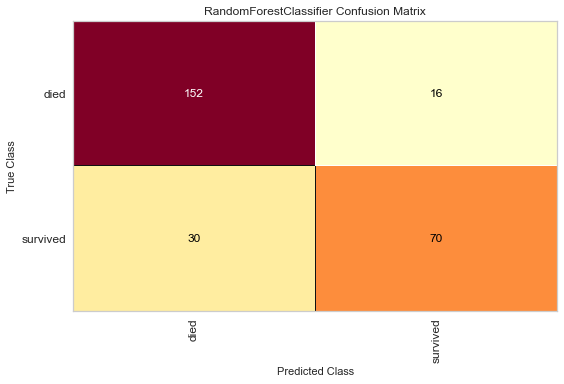

In [13]:
cm = confusion_matrix(rf, X_train, y_train, X_valid, y_valid, classes=["died", "survived"])

## ROC AUC Curve

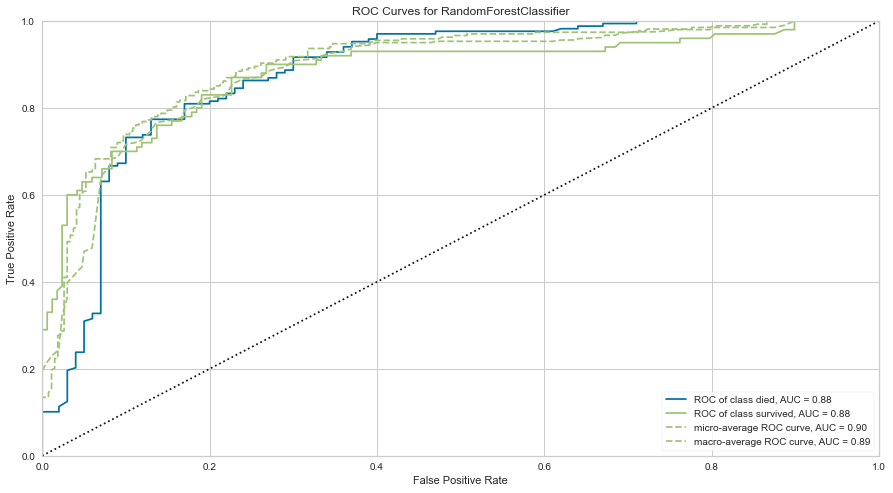

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = roc_auc(rf, X_train, y_train, X_test=X_valid, y_test=y_valid, classes=["died", "survived"])
plt.show()

## Learning Curve

In [15]:
sizes = np.linspace(0.3, 1.0, 10)

In [16]:
cv = model_selection.KFold(n_splits=5)

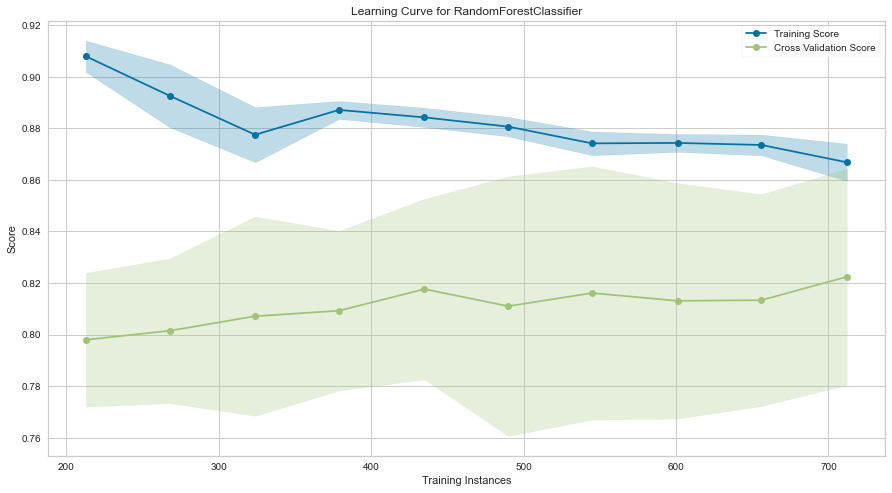

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = learning_curve(rf, X, y, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1)
plt.show()

# SVC

In [18]:
svc_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

In [19]:
svc_grid_search = GridSearchCV(SVC(), svc_params, cv=5, n_jobs=-1)

In [20]:
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [22]:
print("Accuracy on test set:: {:.2f}".format(svc_grid_search.score(X_valid, y_valid)))

Accuracy on test set:: 0.81


In [23]:
print("Best params values: {}".format(svc_grid_search.best_params_)) 
print("Best cross-val accuracy value: {:.2f}".format(svc_grid_search.best_score_))

Best params values: {'C': 1, 'gamma': 0.1}
Best cross-val accuracy value: 0.82


In [24]:
svc = svc_grid_search.best_estimator_

## Confusion Matrix

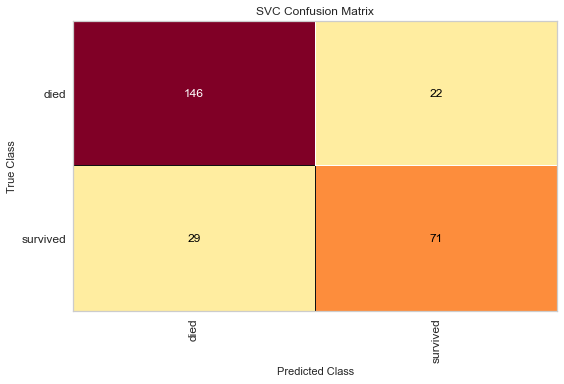

In [25]:
cm = confusion_matrix(svc, X_train, y_train, X_valid, y_valid, classes=["died", "survived"])

## Learning Curve

In [26]:
sizes = np.linspace(0.3, 1.0, 10)

In [27]:
cv = model_selection.KFold(n_splits=5)

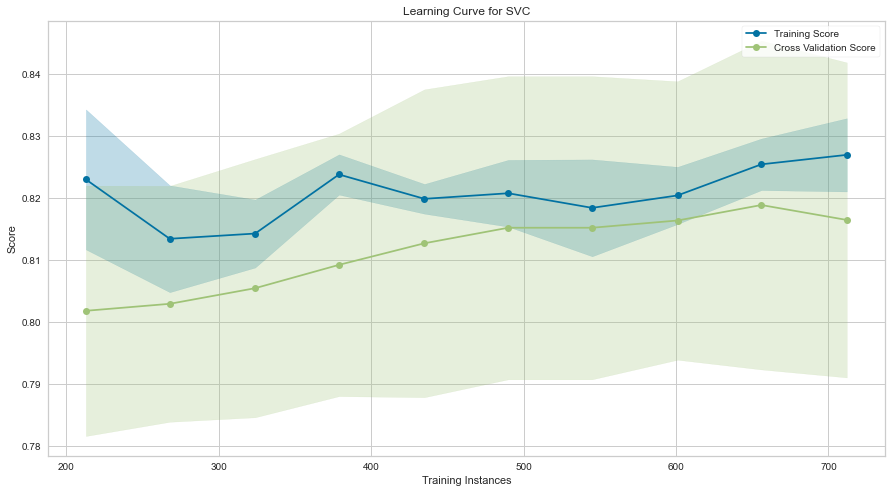

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = learning_curve(svc, X, y, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1)
plt.show()

# Predicting on Test Dataset

## Random Forest

In [29]:
rf_y_pred = rf.predict(X_test)

In [30]:
rf_y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## SVC

In [31]:
svc_y_pred = svc.predict(X_test)

In [32]:
svc_y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Differences and similarities between SVC and RF predictions

In [33]:
t = [1 if i == j else 0 for i, j in zip(rf_y_pred, svc_y_pred)]

In [34]:
print(f"Differences in {t.count(0)} predictions")
print(f"Similarities in {t.count(1)} predictions")

Differences in 33 predictions
Similarities in 385 predictions


In [35]:
d = { 'PassengerId': X_test.index.tolist(), 'Survived': rf_y_pred }

In [39]:
df_pred = pd.DataFrame(d, columns=['PassengerId', 'Survived'])

In [40]:
df_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
